# **Unsupervised Learning**

#### This notebook has been created by Rosanna Turrisi (rosanna.turrisi@edu.unige.it) for students and young reasearchers approaching to Machine Learning in Medicine.

The goal of this notebook is to get familiar with some standard unsupervised analysis. We will perform the analysis on rna-seq data, to get familiar with the concepts.


## Getting Started : installing some packages


This is an interactive Python notebook. To run it, you don't need to install anything on your PC since the script is executed in the cloud. On the left tab, you can see the 'Files' folder, in which data and results will be saved.

First of all, the needed Python packages have to be uploaded. I recommend you get acquainted with getting documentation and help on these packages. For example, google 'python sklearn' and you will get to the documentation quickly. Importing libraries is a necessary step with most progamming languages, not only Python.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt #plots
import pandas as pd #data handling
from sklearn import metrics
from sklearn.decomposition import PCA # dimensionality reduction
import yellowbrick #extension of sklearn for dataviz and model selection

**Answer to the <font color='red'>red questions</font> below.**

## **Data loading and visualization**

First, we download the dataset (X, Y) from a web archive.

In [2]:
import os
import tarfile
import urllib.request as urllib

# Download the full data file at https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
host = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/'
filename = 'TCGA-PANCAN-HiSeq-801x20531.tar.gz'
urllib.urlretrieve (host+filename, filename)

# Extract the tar.gz archive into a folder
tar = tarfile.open(filename)
tar.extractall()
tar.close()

# Get the folder name
path = filename.split('.')[0]

Let's inspect the content of the folder `path`.

In [4]:
print(os.listdir(path))

['labels.csv', 'data.csv']


Let's now load the two files `data.csv` and `labels.csv` in two `pandas` dataframes objects(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
In order to do that we can take advantage of the function `pd.read_csv(filename, header=0, index_col=0)`. We can inspect the content of them by using the `head()` method.

In [5]:
data = pd.read_csv(os.path.join(path, 'data.csv'), header=0, index_col=0)
print("Data matrix shape: {}".format(data.shape))
data.head()

Data matrix shape: (801, 20531)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
labels = pd.read_csv(os.path.join(path, 'labels.csv'), header=0, index_col=0)
print("The labels (correspondig to tumors) are: {}".format(np.unique(labels.values)))
labels.head()

The labels (correspondig to tumors) are: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


The downloaded file is part of a bigger collection available on [Synapse](https://www.synapse.org/#!Synapse:syn300013/files/). This data are part of a study called [The Cancer Genome Atlas (TGCA)](https://cancergenome.nih.gov).
We have 5 different labels corresponding to different tumor types, which are:
* BRCA (Breast Invasiva Carcinoma) - Primary Site: Breast
* COAD (Colon Adenocarcinoma) - Primary site: Colon
* KIRC (Kidney Renal Clear Cell Carcinoma) - Primary Site: Kidney
* LUAD (Lung Adenocarcinoma) - Primary Site: Bronchus and lung
* PRAD (Prostate Adenocarcinoma) - Primary Site: prostate gland.

The input data consists of genes. Why are we interesting in genomics in cancer care?

*Cancer is a disease of the genome. It occurs when changes in a person’s genome – their DNA – result in cells growing and dividing uncontrollably. These genomic changes – or variants – can be inherited from a parent or acquired at some point during a person’s lifetime. Most cancers are caused by acquired genomic variants. In around 5% of cases, however, the individual has inherited a variant that greatly increases their chances of developing cancer*

# Let's start working
`pandas` is a very powerful tool, but for the following exercises we simply need to extract the content of the two
`DataFrame` objects and to save them into `numpy` arrays. We can do that using the method `to_numpy`.

### **Data matrix X**

Transform the table into a matrix

In [8]:
X = data.to_numpy()

In [9]:
print('X dimension:', X.shape)
print('N. features:', X.shape[1])
print('N. samples:', X.shape[0])
print('')

X dimension: (100, 1000)
N. features: 1000
N. samples: 100



**Data Visualization** 

The dimensionality of our dataset is 20531, it's way too big to be visualized!

In order to actually *see* our data points, let's project them in a two-dimensional space.
To this aim, we can use [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [10]:
X_2D = PCA(n_components=2).fit_transform(X)
print("Reduced X shape = {}".format(X_2D.shape))

Reduced X shape = (100, 2)


Let's now visualize our data points in a 2D plot.

Text(0.5, 1.0, '2D Data (PCA)')

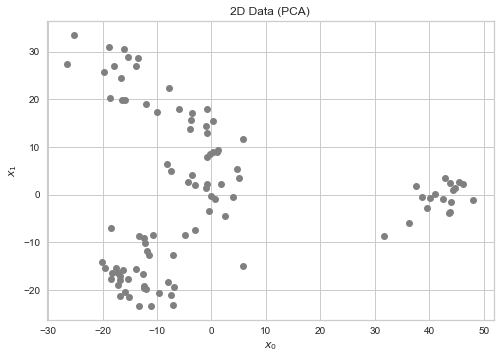

In [11]:
plt.plot(X_2D[:, 0], X_2D[:, 1], 'o', color='grey')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.title('2D Data (PCA)')

We may also transform and plot data into 3D.

Reduced X shape = (100, 3)


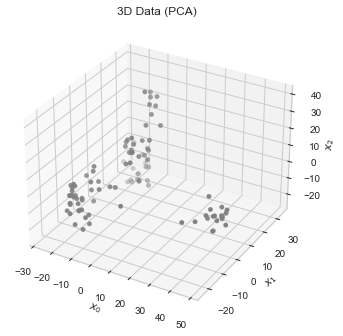

In [12]:
X_3D = PCA(n_components=3).fit_transform(X)
print("Reduced X shape = {}".format(X_3D.shape))

ax = plt.axes(projection='3d')
ax.scatter3D(X_3D[:, 0], X_3D[:, 1],X_3D[:, 2], color='grey')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')
ax.set_title('3D Data (PCA)');

### **Labels Y**

Transform the list of labels into a vector

In [13]:
Y = labels.to_numpy()
print('Y dimension:', Y.shape)
print(Y[:5])

Y dimension: (100, 1)
[['COAD']
 ['LUAD']
 ['COAD']
 ['KIRC']
 ['COAD']]


*REMARK*

This is a vector of strings! 
If we adopt a supervised learning approach, in which the labels are used, we have to transform Y into a vector of numbers by assign a number to each category (e.g., 0 to 'PRAD', 1 to 'LUAD', etc)

**Data Visualization**

When labels are known, we can visualize data by assigns different colors to samples with different labels. In this way, we can visualize data by groups.

Text(0.5, 1.0, '2D Data (PCA)')

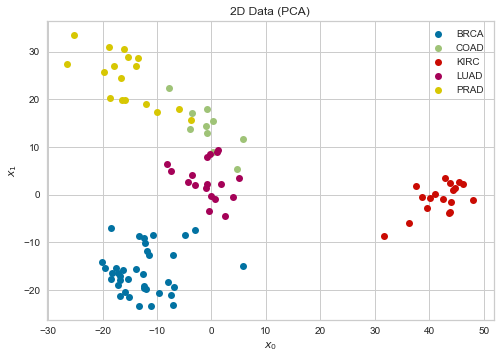

In [14]:
# 2D visualization
for l in np.unique(Y):
    idx = np.where(Y == l)[0]
    plt.plot(X_2D[idx, 0], X_2D[idx, 1], 'o', label=l)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend()
plt.title('2D Data (PCA)')

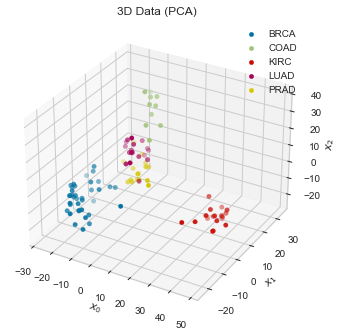

In [15]:
# 3D visualization
ax = plt.axes(projection='3d')
for label in np.unique(Y):
    idx = np.where(Y == label)[0]
    ax.scatter3D(X_3D[idx, 0], X_3D[idx, 1],X_3D[idx, 2], label = label)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')
plt.legend()
ax.set_title('3D Data (PCA)');

## **Unsupervised learning**: K-means clustering

This part aims at trying very basic examples of data clustering via [`K-Means`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). More examples can be found [here](http://scikit-learn.org/stable/modules/clustering.html).

### Fixed number of clusters (``k``)

[K-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering) aims at partitioning `n` observations into `k` clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

The most important free parameter of the algorithm is the number of clusters `k` and it must be specifyed by the user. In general it is not known in advance and finding the optimal number of clusters in a generic data collection is still an [open problem in machine learning](http://stats.stackexchange.com/questions/23472/how-to-decide-on-the-correct-number-of-clusters).

**<font color='red'>If we want to find clusters in which the RNA-Seq samples are gropud according to their tumor, which k do we choose? </font>**

In [16]:
from sklearn.cluster import KMeans

k = 5  # the number of tumors type
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X, Y)

**Clusters visualization**

To visualize our data, let's project it again into a 2D space. To see how good is the obtained cluster, we can 
* plot all data points and assign them colors based on their real label (i.e., the corresponding tumor) - as in the previous section
* plot all data points but this time each point will be assigned to a different color according the resuls obtained by the model.

In order to compare them and better appreciate what's happening, try to plot the two figures side-by-side.

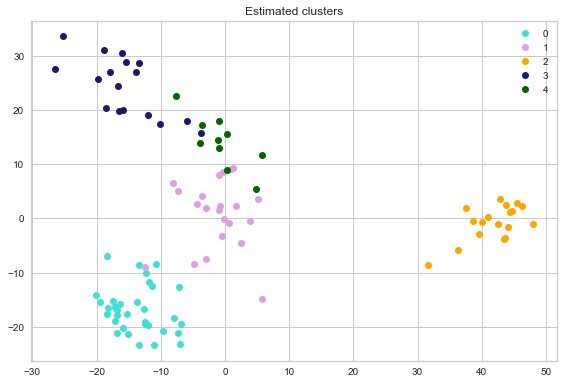

In [17]:
# Estimated clusters
colorlist = ['turquoise', 'plum', 'orange', 'midnightblue', 'darkgreen']
i = 0
for label in np.unique(kmeans.labels_):
    idx = np.where(kmeans.labels_ == label)[0]
    plt.plot(X_2D[idx, 0], X_2D[idx, 1], 'o', color=colorlist[i], label=label)
    i +=1
    
plt.legend()
plt.title('Estimated clusters')
plt.tight_layout();

## Case: Labels avilable
We can compare the estimated clusters with the true labels

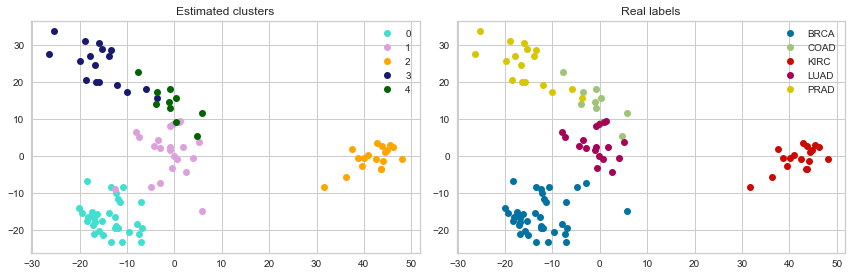

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
colorlist = ['turquoise', 'plum', 'orange', 'midnightblue', 'darkgreen']
i = 0
for label in np.unique(kmeans.labels_):
    idx = np.where(kmeans.labels_ == label)[0]
    plt.plot(X_2D[idx, 0], X_2D[idx, 1], 'o', color=colorlist[i], label=label)
    i +=1
plt.title('Estimated clusters')
plt.legend()


# Real labels
plt.subplot(122)
for label in np.unique(Y):
    idx = np.where(Y == label)[0]
    plt.plot(X_2D[idx, 0], X_2D[idx, 1], 'o', label=label)
plt.title('Real labels')
plt.legend()
plt.tight_layout();



**<font color='red'>Are you satisfied with the obtained results?</font>**

### 2.2 Model assessment

In order to answer to the question above, let's perform some **quantiative** analysis of the results. In literature several [clustering performance evaluation metrics](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) were proposed. In the following we look at five of them.


Measures requiring the labels:
> * [Homogeneity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score): a clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
* [Completeness](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score): a clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
* [V-measure](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score): harmonic mean between homogeneity and completeness.
* [Adjusted Rand Index (ARI)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score): a similarity measure between two groups by considering all pairs of samples and counting pairs that are assigned in the same or different groups in the predicted cluster and true class. This value is equal to 0 when points are assigned into clusters randomly and it is equals to 1 when the clusterings/classes are same.


Completely unsupervised measure:
> * [Silhouette](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score): see below.




## Case: Labels avilable
We can compare the estimated clusters with the true labels. Let's write a simple function `assessment(X, y_true, y_pred)` that returns all the metrics above on a given clustering.

In [19]:
def assessment(X, y_true, y_pred):
    """Measure the quality of a clustering result."""
    homogeneity, completeness, v_measure = metrics.homogeneity_completeness_v_measure(y_true.ravel(), y_pred.ravel())
    ari = metrics.adjusted_rand_score(y_true.ravel(), y_pred.ravel())
    return homogeneity, completeness, v_measure, ari

Assess the quality of the clustering results obtained above.

In [20]:
homogeneity, completeness, v_measure, ari = assessment(X, Y, kmeans.labels_)

print("Scores:\n- homogeneity: {:.3f}\n- completeness: {:.3f}\n- v_measure: {:.3f}\n- ARI: {:.3f}\n".format(homogeneity, completeness, v_measure, ari))

Scores:
- homogeneity: 0.931
- completeness: 0.918
- v_measure: 0.924
- ARI: 0.883



## Case: Labels are not available

### Silhouette analysis

Silhouette analysis can be used to study the separation distance between groups of samples. The silhouette value is a measure of how similar an object is to its own cluster (compactness) compared to other clusters (separability) and it is computed in the following way.

Let $b(i)$ be the lowest average distance of the point $i$ from all the other points in any other cluster of which $i$ is not a member and $a(i)$ the average distance of the point $i$ wrt all the other points in its own cluster. Then the silhouette of $i$ is defined as 
$$\frac{b(i)-a(i)}{max(a(i), b(i))}$$

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess *compactness* and *separability* of each cluster. 

To make things easier load the provided `yellowbrick.cluster` module, and try the `SilhouetteVisualizer` function.

silhouette: 0.259



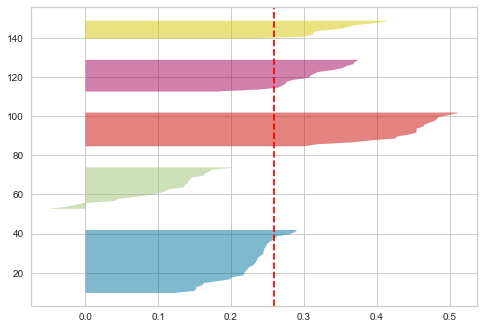

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick').fit(X)
sil = metrics.silhouette_score(X, kmeans.labels_)
print("silhouette: {:.3f}\n".format(sil))

## **One step further: Best `k` selection**

In this section we will pretend that the optimal number of clusters `k` is actually unknown. A sensible choice would be to **learn it** by choosing the one that optimizes some metric. **<font color='red'>Which one would you pick?</font>**

The only purely unsupervised metric we saw is the Silhouette score. So let's write a function that chooses the optimal number of clusters `k` via grid search as the one that **maximizes** the Silhouette score.

In [22]:
def find_best_k(X, k_range, random_state=42):
    """Find the best k via grid search optmizing the Silhouette score."""
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state).fit(X)
        sil = metrics.silhouette_score(X, kmeans.labels_.ravel())
        print('k=' + str(k) + ', silhouette score=' + str(sil))
        silhouette_scores.append(sil)
    print('')
    return k_range[np.argmax(silhouette_scores)]

Test your function on `X`: find the best `k` and run the model assessment.

In [23]:
k_best = find_best_k(X, k_range=np.arange(2, 12))
print('k_best is {}'.format(k_best))

y_pred = KMeans(n_clusters=k_best, random_state=42, n_init=10).fit(X).labels_
homogeneity, completeness, v_measure, ari = assessment(X, Y, y_pred)
sil = metrics.silhouette_score(X, y_pred)
print("Scores:\n- homogeneity: {:.3f}\n- completeness: {:.3f}\n- v_measure: {:.3f}\n- ari: {:.3f}\n- silhouette: {:.3f}".format(homogeneity, completeness, v_measure, ari, sil))

k=2, silhouette score=0.21940039995966532
k=3, silhouette score=0.20514888453418456
k=4, silhouette score=0.2392331203837343
k=5, silhouette score=0.25923897587525396
k=6, silhouette score=0.21371327476847896
k=7, silhouette score=0.21345059866727148
k=8, silhouette score=0.20493749531877944
k=9, silhouette score=0.15598510593387754
k=10, silhouette score=0.1757573600238966
k=11, silhouette score=0.10200996124856751

k_best is 5
Scores:
- homogeneity: 0.931
- completeness: 0.918
- v_measure: 0.924
- ari: 0.883
- silhouette: 0.259


## **Resampling stability**

In Machine Learning, we typically split the dataset into learning and testing set, in order to ensure model generalization to new data. This split may effect the learning peformance. This section evaluates the effect of changing the learning set by resampling the available data with the function random_sampling several times.

**<font color='red'>What do you expect?</font>**


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
def random_sampling(X, y, n_samples):
    """Extract n_samples from X and y."""
    _, idx = next(StratifiedShuffleSplit(n_splits=1, test_size=n_samples).split(X, y))
    return X[idx, :], y[idx]

In [33]:
N = 10 # the number of resampling operations
k_range = np.arange(2,12)
n = 70 # the number of samples extracted each time

# containers for our results
results = {'best_k': [],
           'homogeneity': [],
           'completeness': [],
           'v_measure': [],
           'ari': [],
           'silhouette': []}

# Run the N pipelines
for i in range(N):
    X_i, y_i = random_sampling(X, Y, n_samples=n)

    k_best = find_best_k(X_i, k_range=k_range)
    y_pred_i = KMeans(n_clusters=k_best).fit(X_i).labels_
    homogeneity, completeness, v_measure, ari = assessment(X_i, y_i, y_pred_i)
    sil = metrics.silhouette_score(X, y_pred)

    results['best_k'].append(k_best)
    results['homogeneity'].append(homogeneity)
    results['completeness'].append(completeness)
    results['v_measure'].append(v_measure)
    results['ari'].append(ari)
    results['silhouette'].append(sil)

k=2, silhouette score=0.21060795973559684
k=3, silhouette score=0.20591719013413098
k=4, silhouette score=0.23493796262209418
k=5, silhouette score=0.25500566451874496
k=6, silhouette score=0.21009542046438592
k=7, silhouette score=0.19622465455322655
k=8, silhouette score=0.18010135283175943
k=9, silhouette score=0.17337043231290564
k=10, silhouette score=0.1431720846001498
k=11, silhouette score=0.15331227638210024

k=2, silhouette score=0.2307682860862956
k=3, silhouette score=0.2161117249281915
k=4, silhouette score=0.24815845643093906
k=5, silhouette score=0.27277074819340985
k=6, silhouette score=0.2552358736562624
k=7, silhouette score=0.21810220176889955
k=8, silhouette score=0.17527840187525418
k=9, silhouette score=0.16961861577744264
k=10, silhouette score=0.1727731137960261
k=11, silhouette score=0.16741284425862568

k=2, silhouette score=0.2236490112269031
k=3, silhouette score=0.20043343493853602
k=4, silhouette score=0.2348841009693247
k=5, silhouette score=0.25670829096

Let's plot the obtained results!

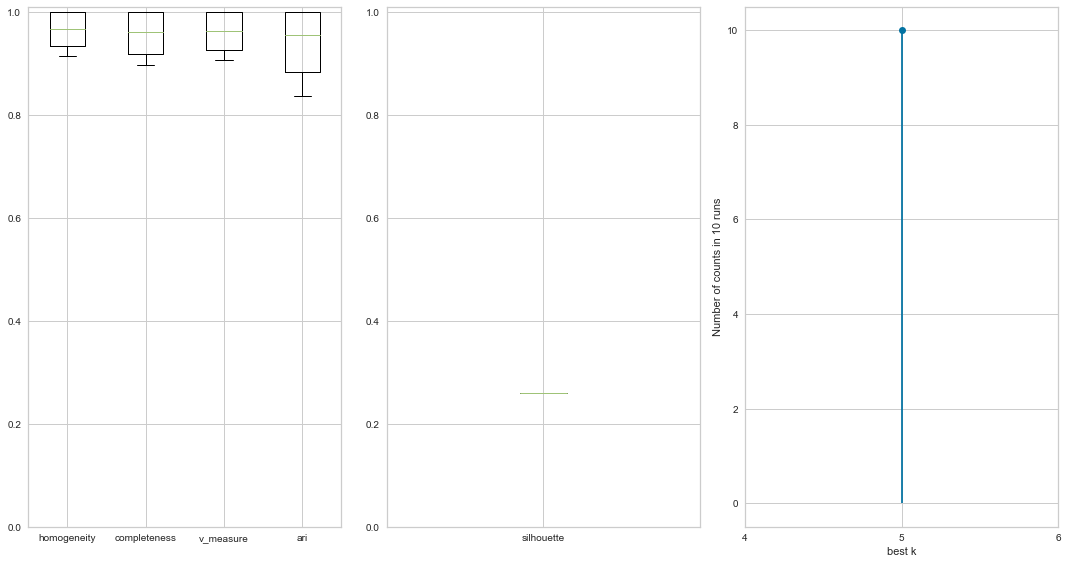

In [34]:
from collections import Counter

plt.figure(figsize=(15,8))
plt.subplot(131)
bp = plt.boxplot([results['homogeneity'], results['completeness'], results['v_measure'], results['ari']]);
plt.xticks(range(1, 5), ['homogeneity', 'completeness', 'v_measure', 'ari']);
plt.ylim([0,1.01])

plt.subplot(132)
plt.boxplot([results['silhouette']]);
plt.xticks([1], ['silhouette']);
plt.ylim([0,1.01])

plt.subplot(133)
counts = Counter(results['best_k'])
plt.stem(list(counts.keys()), list(counts.values()))
plt.xticks(list(range(min(counts.keys())-1, max(counts.keys())+2)))
plt.xlabel("best k")
plt.ylabel('Number of counts in {} runs'.format(N))

plt.tight_layout()
plt.show()